# Temperature Prediction

When we want to hiking or travelling, sometimes we have to know how's the weather and how's the temperature. One easy way is to look at the weather before that day. In this project, I will create machine learning that will allow us to know the temperature based on the temperature of the previous few days. Hopefully this machine learning can help anyone who wants to know what the temperature should be the next day.

The sections on this project will be:

1. Data Cleansing & Preparation
2. Model Building
3. Forecasting

So, here we go!

**Input Libraries**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, silhouette_score
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import fbprophet
import warnings

# 1. Data Cleansing & Preparation

In [2]:
suhu = pd.read_csv('daily-min-temperatures.csv')

In [3]:
suhu.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
suhu['Date'] = pd.to_datetime(suhu['Date'])

In [5]:
suhu.columns =  ['ds', 'y']

In [6]:
suhu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3650 non-null   datetime64[ns]
 1   y       3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


no missing values

# 2. Model Building

Then, split dataset into trainset (before 1989), validset (in 1989), and testset (in 1990)

In [7]:
trainset = suhu[suhu['ds'].dt.year < 1989]
validset = suhu[suhu['ds'].dt.year == 1989]
testset = suhu[suhu['ds'].dt.year == 1990]

Define the optimal score of yearly_seasonality, weekly_seasonality, and changepoint_prior_scale.

In [8]:
prophet = fbprophet.Prophet(yearly_seasonality=True,
                            daily_seasonality=False,
                            weekly_seasonality=True,
                            changepoint_prior_scale=True)

In [9]:
prophet.fit(trainset)

In [10]:
trainset_predict = prophet.predict(trainset[['ds']])['yhat']
validset_predict = prophet.predict(validset[['ds']])['yhat']
testset_predict = prophet.predict(testset[['ds']])['yhat']

a.) Unoptimized

In [11]:
mean_squared_error(trainset['y'], trainset_predict, squared=False)

2.701552120772354

In [12]:
mean_squared_error(validset['y'], validset_predict, squared=False)

2.9537683445754577

In [13]:
mean_squared_error(testset['y'], testset_predict, squared=False)

3.0443266658679793

b.) optimized

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


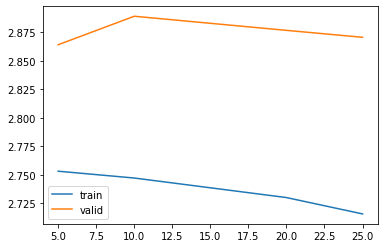

In [14]:
params = [5, 10, 20, 25]
train = []
valid = []

for par in params:
    
    fbprophet2 = fbprophet.Prophet(yearly_seasonality=par)
    fbprophet2.fit(trainset)

    trainset_predict = fbprophet2.predict(trainset[['ds']])['yhat']
    validset_predict = fbprophet2.predict(validset[['ds']])['yhat']

    rmse_train = mean_squared_error(trainset['y'], trainset_predict, squared=False)
    rmse_valid = mean_squared_error(validset['y'], validset_predict, squared=False)

    train.append(rmse_train)
    valid.append(rmse_valid)

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [15]:
params[np.argmin(valid)]

5

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


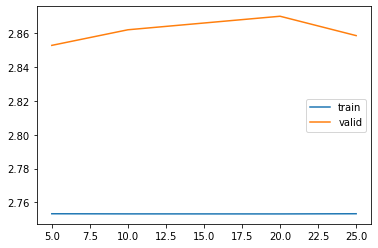

In [16]:
params = [5, 10, 20, 25]
train = []
valid = []

for par in params:
    
    fbprophet2 = fbprophet.Prophet(yearly_seasonality=5,
                                   weekly_seasonality=par)
    fbprophet2.fit(trainset)

    trainset_predict = fbprophet2.predict(trainset[['ds']])['yhat']
    validset_predict = fbprophet2.predict(validset[['ds']])['yhat']

    rmse_train = mean_squared_error(trainset['y'], trainset_predict, squared=False)
    rmse_valid = mean_squared_error(validset['y'], validset_predict, squared=False)

    train.append(rmse_train)
    valid.append(rmse_valid)

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [17]:
params[np.argmin(valid)]

5

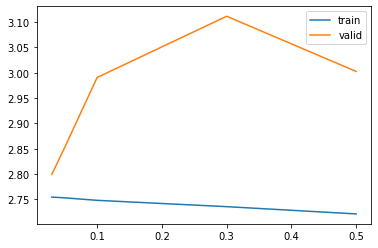

In [18]:
params = [0.03, 0.05, 0.1, 0.3, 0.5]
train = []
valid = []

for par in params:
    
    fbprophet2 = fbprophet.Prophet(yearly_seasonality=5,
                                   daily_seasonality=False,
                                   weekly_seasonality=5,
                                   changepoint_prior_scale=par)
    fbprophet2.fit(trainset)

    trainset_predict = fbprophet2.predict(trainset[['ds']])['yhat']
    validset_predict = fbprophet2.predict(validset[['ds']])['yhat']

    rmse_train = mean_squared_error(trainset['y'], trainset_predict, squared=False)
    rmse_valid = mean_squared_error(validset['y'], validset_predict, squared=False)

    train.append(rmse_train)
    valid.append(rmse_valid)

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()


In [19]:
params[np.argmin(valid)]

0.03

In [20]:
prophet_final = fbprophet.Prophet(daily_seasonality=False,
                                  weekly_seasonality=5,
                                  yearly_seasonality=5,
                                  changepoint_prior_scale=0.03)

In [21]:
prophet_final.fit(trainset)

In [22]:
trainset_predict = prophet_final.predict(trainset[['ds']])['yhat']
validset_predict = prophet_final.predict(validset[['ds']])['yhat']
testset_predict = prophet_final.predict(testset[['ds']])['yhat']

rmse_train = mean_squared_error(trainset['y'], trainset_predict, squared=False)
rmse_valid = mean_squared_error(validset['y'], validset_predict, squared=False)
rmse_test = mean_squared_error(testset['y'], testset_predict, squared=False)

In [23]:
print(rmse_train, rmse_valid, rmse_test)

2.7547982397412434 2.7994265994897227 2.838638606553131


we can see that the optimized model is much better than the non-optimized one, because the optimized rmse result is not overfit

now, we show the plot

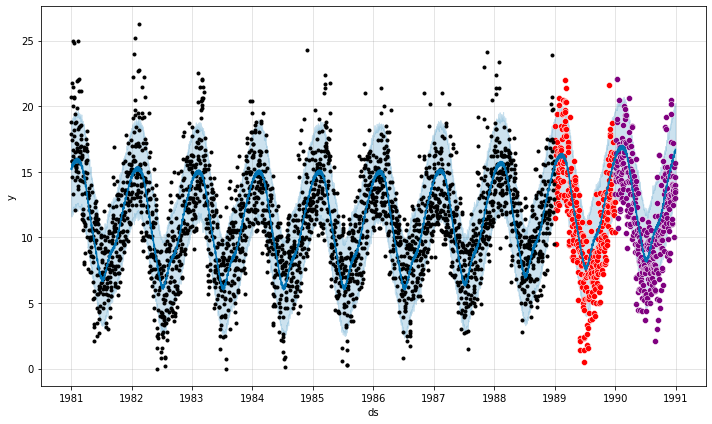

In [24]:
prophet_final.plot(prophet_final.predict(suhu[['ds']]))
sns.scatterplot(data=validset, x='ds', y='y', color='red')
sns.scatterplot(data=testset, x='ds', y='y', color='purple')
plt.show()

that is the plot of temperature from the dataset from 1981-1991

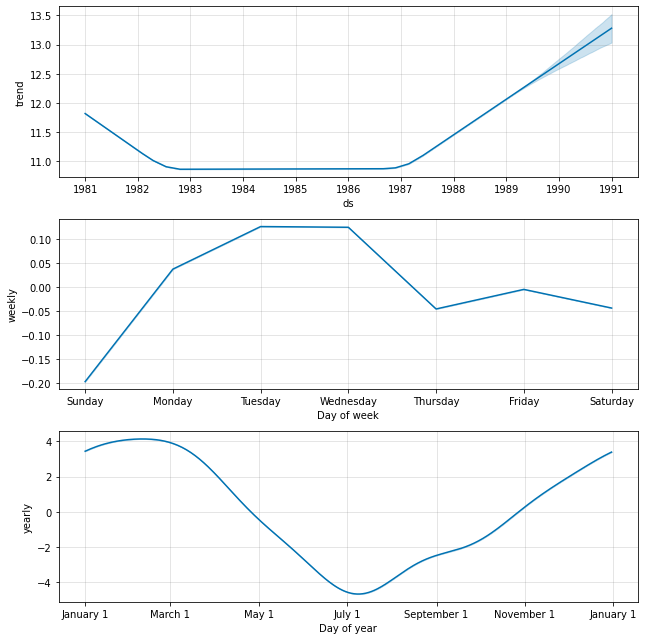

In [25]:
prophet_final.plot_components(prophet_final.predict(suhu[['ds']]))
plt.show()

that is plot of the final model (for weekly and yearly)

# 3. Forecasting

I will make daily predictions for 5 years after the last date in the dataset using the final model

In [26]:
trainset['ds'].tail()

2915   1988-12-26
2916   1988-12-27
2917   1988-12-28
2918   1988-12-29
2919   1988-12-30
Name: ds, dtype: datetime64[ns]

In [27]:
future = prophet_final.make_future_dataframe(85, 'M')

In [28]:
future

,ds
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
...,...
3000,1995-08-31
3001,1995-09-30
3002,1995-10-31
3003,1995-11-30


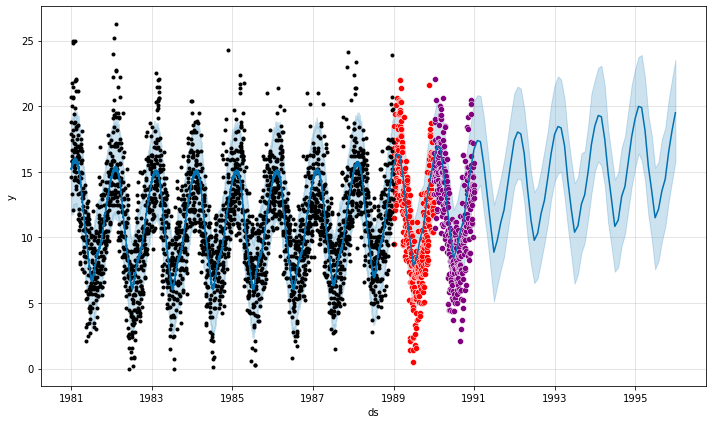

In [29]:
prophet_final.plot(prophet_final.predict(future))
sns.scatterplot(data=validset, x='ds', y='y', color='red')
sns.scatterplot(data=testset, x='ds', y='y', color='purple')
plt.show()

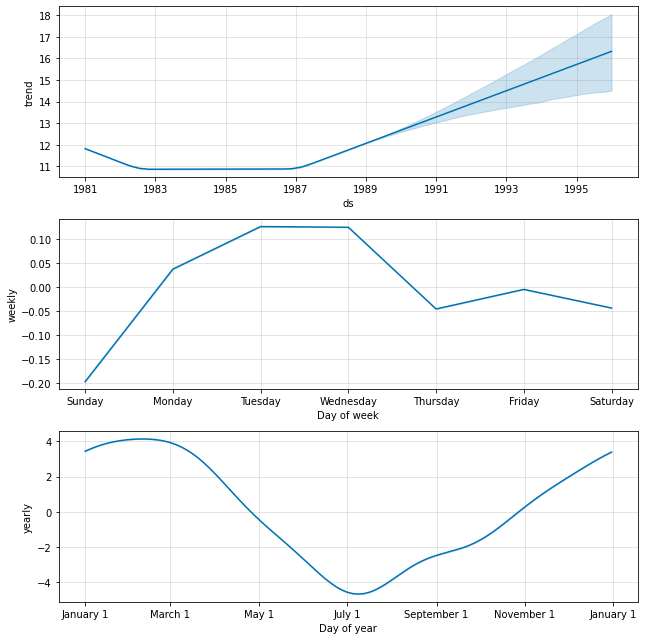

In [30]:
prophet_final.plot_components(prophet_final.predict(future))
plt.show()

that is the plot for forecasting the temperature in the next 5 years.